In [1]:
from vnstock import *
from function import *
from operators import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

In [2]:
close= pd.read_csv("Data/close.csv",index_col="TradingDate")
close.index = pd.to_datetime(close.index)
high= pd.read_csv("Data/high.csv",index_col="TradingDate")
high.index = pd.to_datetime(high.index)
low= pd.read_csv("Data/low.csv",index_col="TradingDate")
low.index = pd.to_datetime(low.index)
open= pd.read_csv("Data/open.csv",index_col="TradingDate")
open.index = pd.to_datetime(open.index)
x='2023-02-14'

##### VN30

In [ ]:

ticket = ['ACB', 'BCM', 'BID', 'BVH', 'CTG', 'FPT', 'GAS', 'GVR', 'HDB', 'HPG', 'MBB', 'MSN', 'MWG', 'NVL', 'PDR', 'PLX', 'POW', 'SAB', 'SSI', 'STB', 'TCB', 'TPB', 'VCB', 'VHM', 'VIB', 'VIC', 'VJC', 'VNM', 'VPB', 'VRE']
frame = []
for i in ticket:
    a = stock_historical_data(symbol=i, 
                            start_date=x, 
                            end_date=x)    
    a["ticker"] = i
    frame.append(a)
    
q = pd.concat(frame)
close= q.pivot_table(values="Close", columns="ticker", index="TradingDate").to_csv("Data/close.csv",mode=a)
high= q.pivot_table(values="High", columns="ticker", index="TradingDate").to_csv("Data/high.csv",mode=a)
low= q.pivot_table(values="Low", columns="ticker", index="TradingDate").to_csv("Data/low.csv",mode=a)
open= q.pivot_table(values="Open", columns="ticker", index="TradingDate").to_csv("Data/open.csv",mode=a)

### Markowitz model

In [5]:
w = marko_weights(close)
returns=close.pct_change()

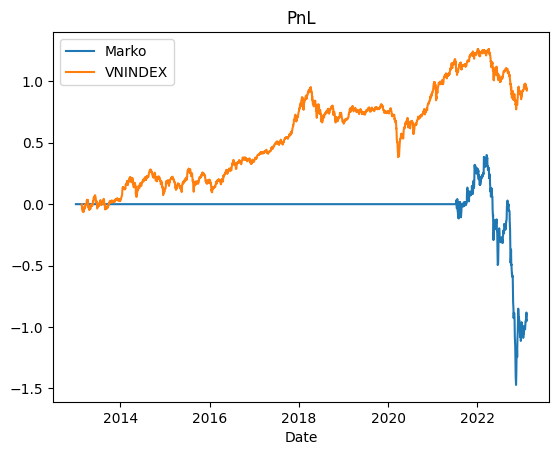

In [6]:
a = Simresult(w,returns=returns)
a.plot_pnl("Marko")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [3]:
close_t5=close-close.shift(5)

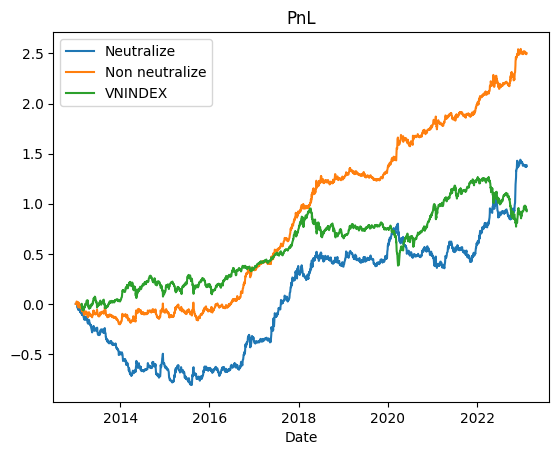

In [4]:
returns = close.pct_change()
w  = weights(close_t5, neutrali=1)
neu=Simresult(weights=w,returns=returns)
neu.plot_pnl(type="Neutralize")

w1  = weights(close_t5, neutrali=0)
non_neu=Simresult(weights=w1,returns=returns)
non_neu.plot_pnl(type="Non neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [59]:
neu.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.116131,1.026037,0.581226,0.458632,199.803249


In [60]:
neu.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.289115,-2.886706,0.628499,-1.957878,-460.008984
2014,-0.027787,-0.257894,0.603191,-0.055352,-46.065815
2015,0.025631,0.238350,0.585701,0.049861,43.760729
2016,0.372940,3.047322,0.581179,2.441085,641.695733
2017,0.467491,3.511050,0.542485,3.259341,861.758345
2018,0.032162,0.279907,0.577621,0.066049,55.680814
2019,0.094289,1.042111,0.622486,0.405582,151.471136
2020,-0.009300,-0.083557,0.577321,-0.010605,-16.109737
2021,0.139454,1.403362,0.563189,0.698326,247.614661


In [61]:
non_neu.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.250125,1.453026,0.594381,0.942582,420.81521


In [62]:
non_neu.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.201883,-1.312268,0.633236,-0.740952,-318.811946
2014,0.116070,0.680709,0.611300,0.296616,189.873894
2015,0.022471,0.146641,0.596954,0.028451,37.643256
2016,0.403735,2.814558,0.548013,2.415812,736.725821
2017,0.581298,4.198096,0.518273,4.446033,1121.606869
2018,0.329990,1.630178,0.582216,1.227280,566.783493
2019,0.124867,1.159499,0.625107,0.518224,199.753455
2020,0.420794,2.003896,0.587899,1.695347,715.758765
2021,0.210838,1.288363,0.609508,0.757745,345.914824


### alpha = rank(ts_delta(close,5))

In [3]:
alpha = rank(ts_delta(close,5))
w =weights(alpha)
w1 =weights(alpha,neutrali=1)

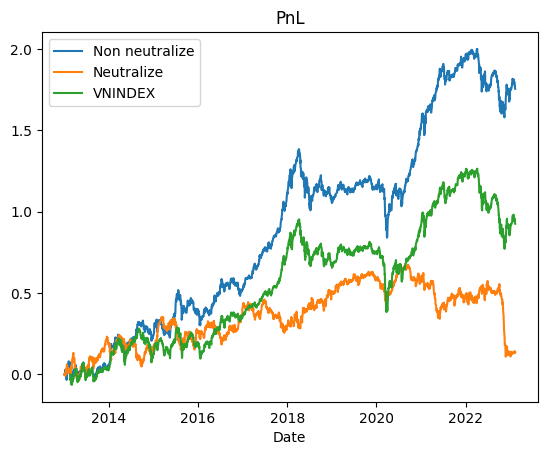

In [4]:
returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(-1*w1,returns)
b.plot_pnl("Neutralize")

plot_vnindex()


In [5]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.175442,0.890848,0.279455,0.705854,627.801844


In [6]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.013438,0.079706,1.155663,0.008595,11.627919


### alpha2 = rank(ts_stddev(close,20)/(ts_sum(close,20)/20))

In [7]:
alpha2 = rank(ts_std(close,20)/(ts_sum(close,20)/20))

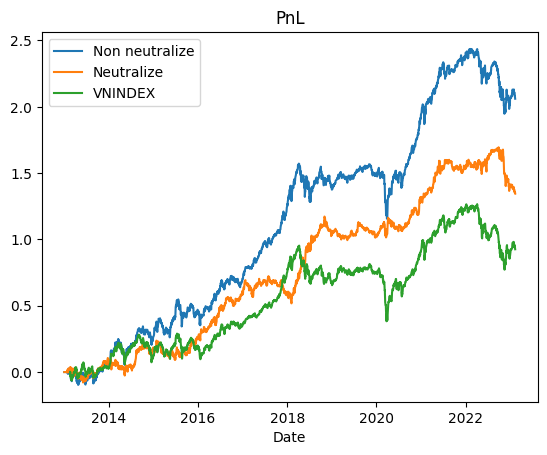

In [8]:
w =weights(alpha2, neutrali=0)
w1 =weights(alpha2,neutrali=1)

a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [9]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.205999,0.929871,0.077905,1.512068,2644.216304


In [40]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.134427,0.752887,0.321123,0.487122,418.615541


### alpha3 = (close-ts_min(low,14))/(ts_max(high,14)-ts_min(low,14))*100

In [10]:
alpha3 = (close-ts_min(low,14))/(ts_max(high,14)-ts_min(low,14))*100

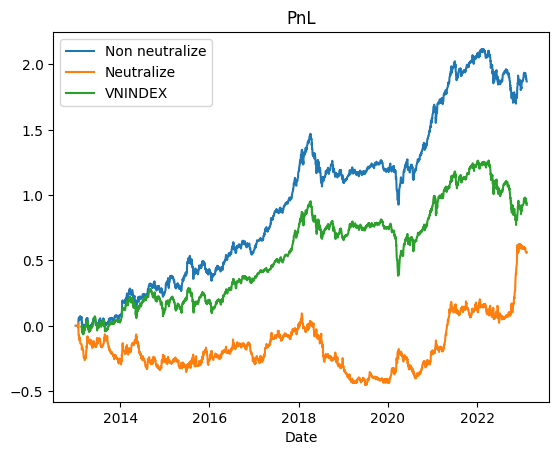

In [11]:
w =weights(alpha3, neutrali=0)
w1 =weights(alpha3,neutrali=1)

a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [12]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.186949,0.97842,0.238743,0.865809,783.056815


In [13]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.056085,0.297724,1.034103,0.069336,54.235464


### alpha4 = close-ts_product(close,2)^0.5

In [26]:
alpha4 = close-ts_product(close,2)**0.5

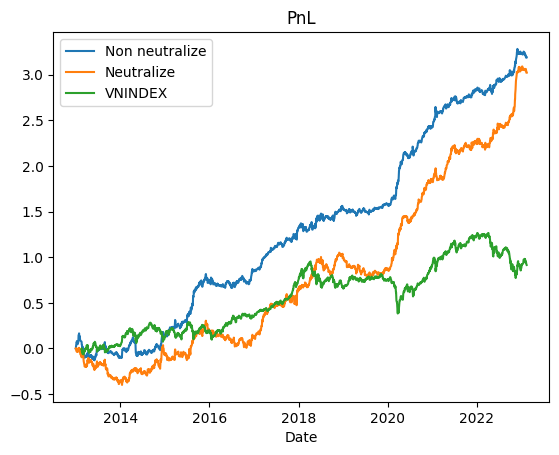

In [4]:
w = weights(alpha4,neutrali=0)
w1 =weights(alpha4,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [5]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.31883,1.775482,1.331533,0.868801,239.445986


In [6]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.301959,1.411115,2.430707,0.497359,124.226695


### alpha6
a = ts_sum(open>close,20)/ts_sum(open<close,20);

b = ts_sum(open>close,250)/ts_sum(open<close,250);

rank(a/b)

In [20]:
a=ts_sum(1*(open>close),20)/ts_sum(1*(open<close),20)
b=ts_sum(1*(open>close),250)/ts_sum(1*(open<close),250)
alpha6=rank(a/b)

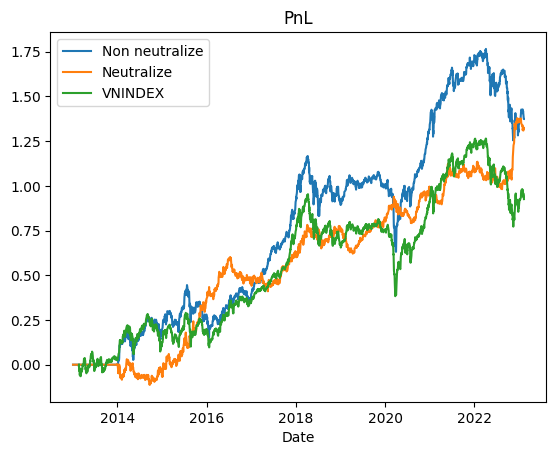

In [21]:
w =weights(alpha6, neutrali=0)
w1 =-1*weights(alpha6,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [22]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.137306,0.704386,0.121601,0.748492,1129.154626


In [23]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.132059,0.910868,0.501322,0.467499,263.420573


### alpha7=ts_zscore(close,2)

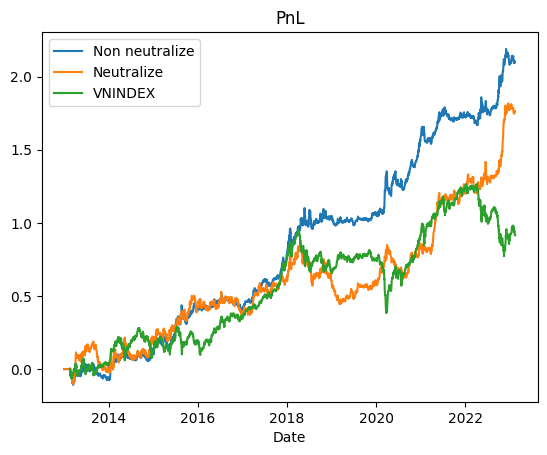

In [3]:
alpha7 = ts_zscore(close,30)
w =weights(alpha7, neutrali=0)
w1 =weights(alpha7,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

plot_vnindex()

In [4]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.210006,1.227007,0.332388,0.975303,631.808595


In [5]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.176338,0.916854,0.733388,0.449579,240.442761


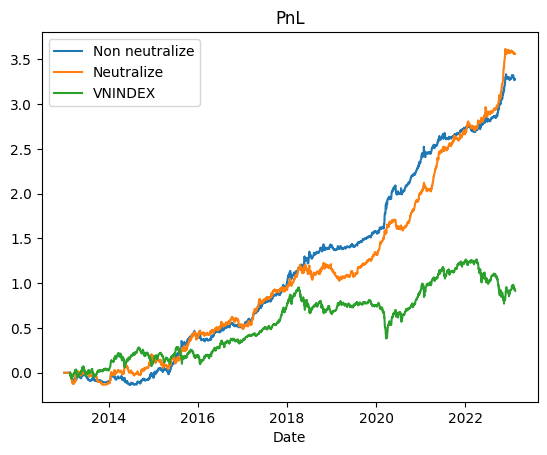

In [28]:
alpha = (0.3*alpha7+0.6*ts_zscore(close,2))
w =weights(alpha, neutrali=0)
w1 =weights(alpha,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [30]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.327536,2.044728,0.805,1.304269,406.877152


In [29]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.098744,-0.989431,0.289751,-0.577603,-340.790405
2014,0.044232,0.322123,0.518678,0.094067,85.277915
2015,0.470798,2.897606,0.759671,2.281097,619.738971
2016,0.093742,0.704886,0.757963,0.247892,123.676159
2017,0.500289,4.765331,0.888340,3.576137,563.173246
2018,0.409289,1.932597,0.922658,1.287171,443.598255
2019,0.171930,1.942256,0.904652,0.846722,190.050508
2020,0.795538,3.790644,0.922108,3.520891,862.738498
2021,0.359078,2.132661,0.976478,1.293257,367.727268


In [23]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.334612,1.82294,1.447939,0.876331,231.095391


In [24]:
b.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.100115,-0.788265,0.390402,-0.399178,-256.441354
2014,0.227822,1.227534,0.797663,0.656027,285.612117
2015,0.224994,1.056124,1.290246,0.441026,174.380907
2016,0.092118,0.566386,1.191788,0.157465,77.293872
2017,0.431277,2.726357,1.666967,1.386747,258.719526
2018,0.184932,0.782081,1.740366,0.254940,106.260315
2019,0.165754,1.266242,1.684315,0.397226,98.410493
2020,0.635458,3.778205,1.780909,2.256877,356.816498
2021,0.641518,3.384358,1.764549,2.040628,363.559255


In [19]:
w1.iloc[-1,:].sort_values(ascending=False)

SAB    0.159383
BID    0.156300
CTG    0.135520
VRE    0.131980
STB    0.125571
MWG    0.108328
MSN    0.105463
VJC    0.076304
VCB    0.001151
HDB   -0.007401
PLX   -0.008959
GAS   -0.016688
BCM   -0.017834
HPG   -0.028927
TPB   -0.029546
POW   -0.030607
BVH   -0.033511
ACB   -0.034192
VIB   -0.040083
MBB   -0.045686
SSI   -0.053735
TCB   -0.059582
GVR   -0.062205
VIC   -0.067835
VNM   -0.071080
VHM   -0.088754
VPB   -0.090913
PDR   -0.102193
NVL   -0.110270
FPT         NaN
Name: 2023-02-13 00:00:00, dtype: float64

In [ ]:
save_weights(w,x)

In [41]:
import numpy as np
import pandas as pd
import random

# Load the time series data into a pandas DataFrame
data = close

# Define the Q-Learning algorithm
def q_learning(data, n_actions, alpha, gamma, epsilon, max_steps):
    # Initialize the Q-table with zeros
    Q = np.zeros((data.shape[0], n_actions))

    for i in range(max_steps):
        # Initialize the state
        state = np.random.randint(0, data.shape[0])
        
        # Choose an action using epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = np.random.choice(n_actions)
        else:
            action = np.argmax(Q[state, :])

        next_state = state + 1
        # Get the next state and reward based on the action
        if next_state == len(close):
            next_state = np.random.randint(0,len(close))
            reward = 0
        else:    
            reward = data.iloc[next_state, action] - data.iloc[state, action]
        
        # Update the Q-table using Bellman equation
        Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]))
    
    return Q

# Define the number of actions (i.e., the number of stocks to invest in)
n_actions = 30

# Define the learning rate, discount factor, and exploration rate
alpha = 0.1
gamma = 0.9
epsilon = 0.1

# Define the number of steps
max_steps = 100000

# Run the Q-Learning algorithm
Q = q_learning(data, n_actions, alpha, gamma, epsilon, max_steps)

df = pd.DataFrame(Q)

In [46]:
weights=df.div(df.abs().sum(axis=1),axis=0)
weights.columns = ticket
weights.index = close.index

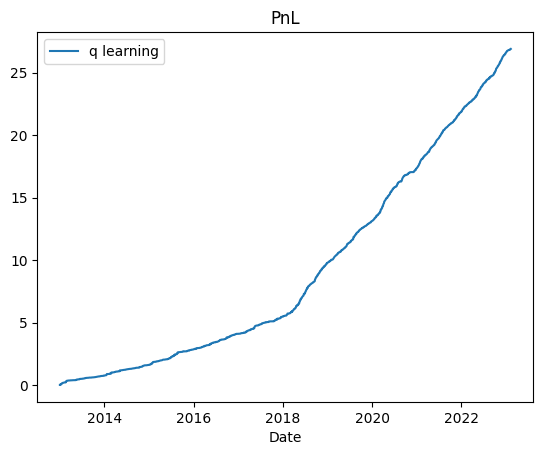

In [47]:
a = Simresult(weights,close.pct_change())
a.plot_pnl("q learning")

In [48]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,0.773968,6.460941,0.064721,16.076898,11958.554364
2014,0.872495,7.231508,0.119713,19.105361,7288.225908
2015,1.253939,7.288349,0.085290,23.084068,14702.028784
2016,1.257116,8.700565,0.124208,27.591801,10121.034219
2017,1.377069,6.828175,0.130227,22.204080,10574.411802
2018,4.326821,14.200458,1.235858,26.570670,3501.065946
2019,3.394455,15.632685,1.694747,22.124127,2002.926915
2020,4.231992,14.073931,1.323556,25.166140,3197.439847
2021,4.569020,18.941651,1.659955,31.425425,2752.495911


In [49]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,2.689725,11.166385,0.815207,20.283014,3299.436631
